In [108]:
# import necessary libraries

# For Data Analysis
import pandas as pd 
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-Processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluatin Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [109]:
# Load Dataset - from seaborn
df= pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
# For better understanding and flow of analysis, i will rename some of the columns
df.columns= ['age','sex','chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar','rest_ecg','max_heart_rate_achieved','exercise_induced_angina',
        'st_depression', 'st_slope', 'num_major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
# investigate the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [112]:
# Statistical Analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

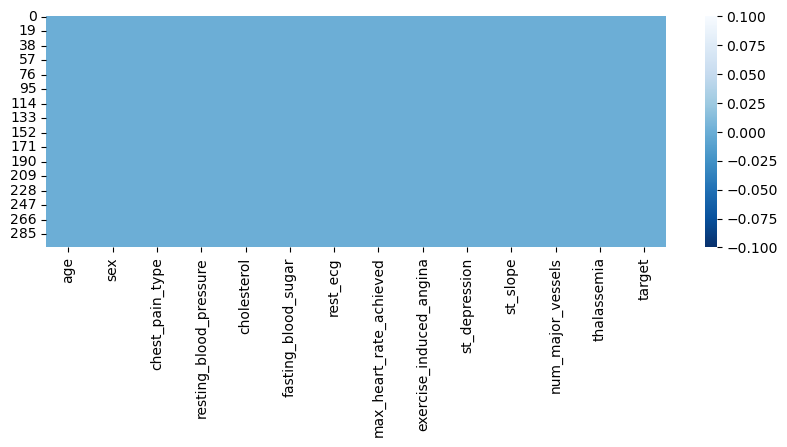

In [113]:
# Check for missing values
print(df.isnull().sum())

#Visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

## Exploratory Data Analysis

UNIVARIATE ANALYSIS

<Axes: xlabel='thalassemia'>

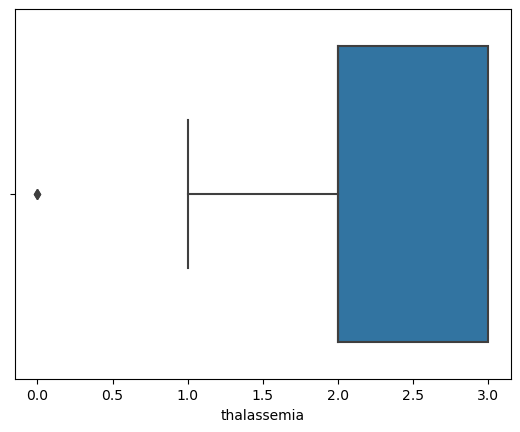

In [114]:
# Check for outliers.
sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

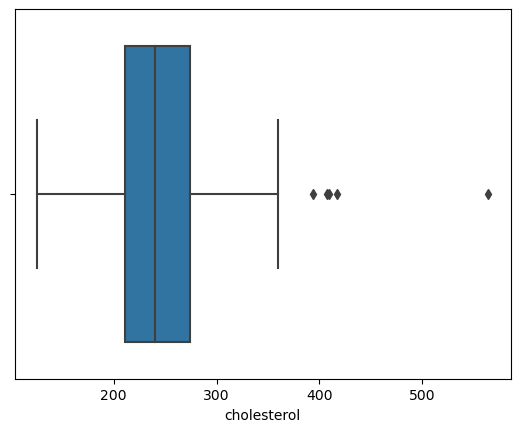

In [115]:
sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

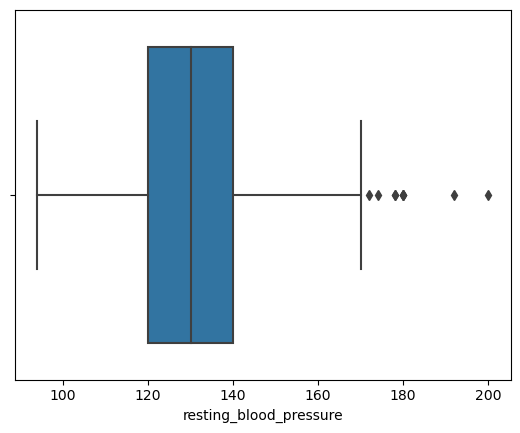

In [116]:
sns.boxplot(x=df["resting_blood_pressure"])

<Axes: xlabel='max_heart_rate_achieved'>

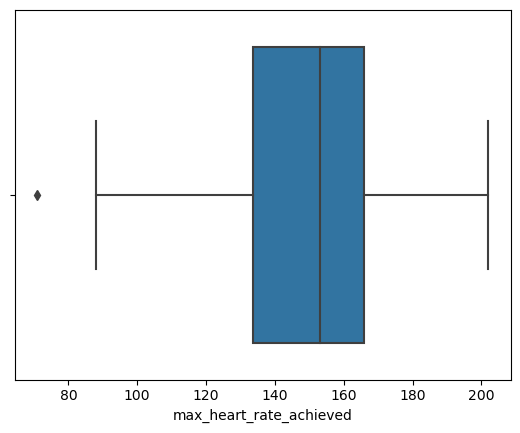

In [117]:
# Check for outliers.
sns.boxplot(x=df["max_heart_rate_achieved"])

Text(0.5, 1.0, 'Total Number of Patients')

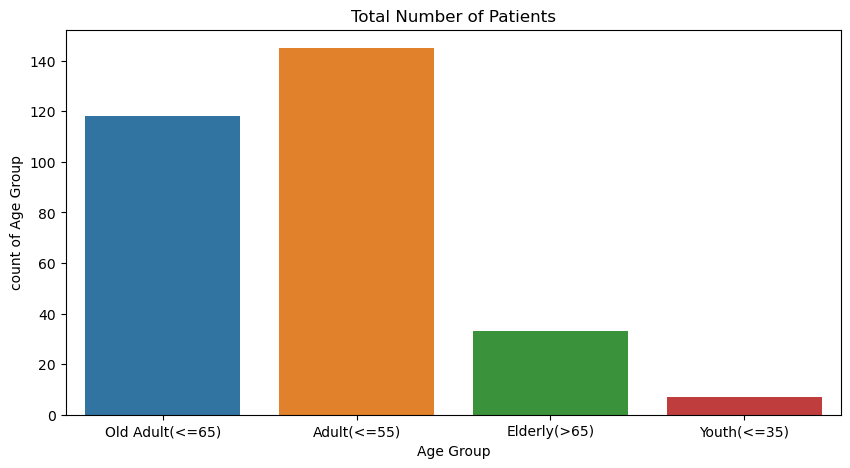

In [118]:
#Data Visualization
#Age_bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
df['age_bracket'] = df['age'].apply(age_bracket)

#Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x= 'age_bracket', data=df)
plt.xlabel("Age Group")
plt.ylabel("count of Age Group")
plt.title('Total Number of Patients')

--Insight:The majority of patients are in the "Adult" age group (between 35 and 55 years old), followed by "Old Adults" (55 to 65 years old). There seems to be a relatively smaller number of patients in the "Elderly" category (>65 years old)

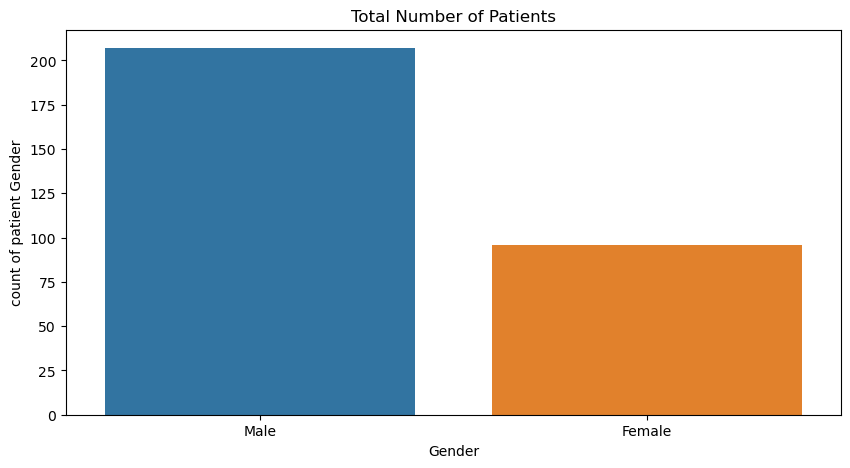

In [119]:
#sex
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
df['gender'] = df['sex']. apply(gender)

# Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('count of patient Gender')
plt.title('Total Number of Patients');

--Insight: The dataset contains a larger number of male patients compared to female patients.

Text(0.5, 1.0, 'Total Number of Patients')

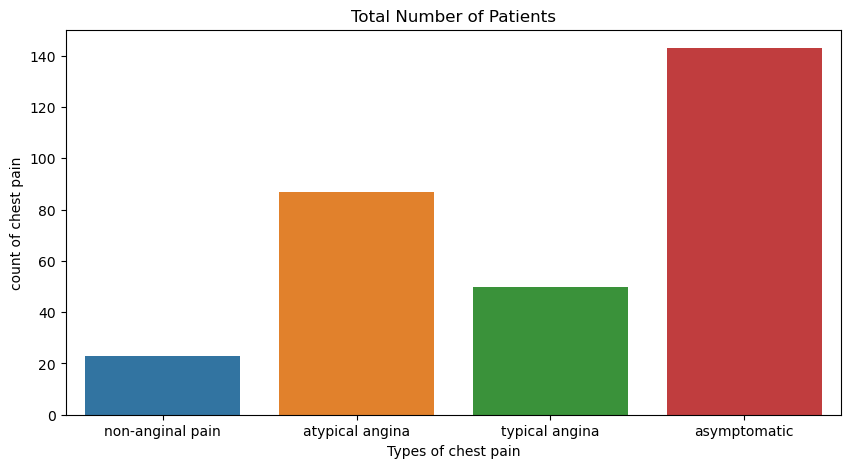

In [120]:
#chest pain type(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymtomatic)
def chest_pain(chp):
    if chp == 1:
        return "typical angina"
    elif chp == 2:
        return "atypical angina"
    elif chp == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df['chp_cat'] = df['chest_pain_type'].apply(chest_pain)
plt.figure(figsize = (10, 5))
sns.countplot(x= 'chp_cat', data=df)
plt.xlabel("Types of chest pain")
plt.ylabel("count of chest pain")
plt.title('Total Number of Patients')

--Insight: Most patients have "typical angina" or "atypical angina," while a smaller number experience "non-anginal pain" or are "asymptomatic."

Yes    165
No     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

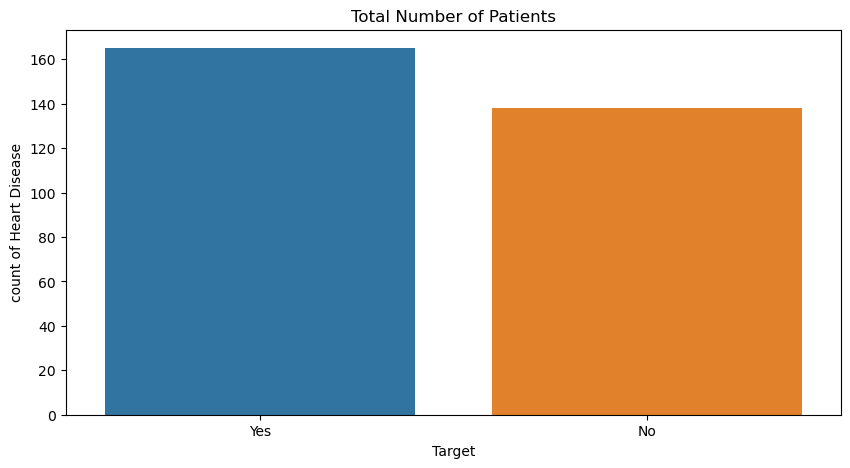

In [150]:
# target - have heart disease or not (1 =yes, 0=no)
def label(tg):
    if tg == 1: 
        return "Yes"
    else:
        return "No"
df["label"] = df[ 'target']. apply(label)

print(df["label"].value_counts())

plt.figure(figsize = (10, 5))
sns.countplot(x= 'label', data=df)
plt.xlabel("Target")
plt.ylabel("count of Heart Disease")
plt.title('Total Number of Patients')  

--Insight: The dataset is somewhat balanced between patients with and without heart disease, which is important for model training.

### Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

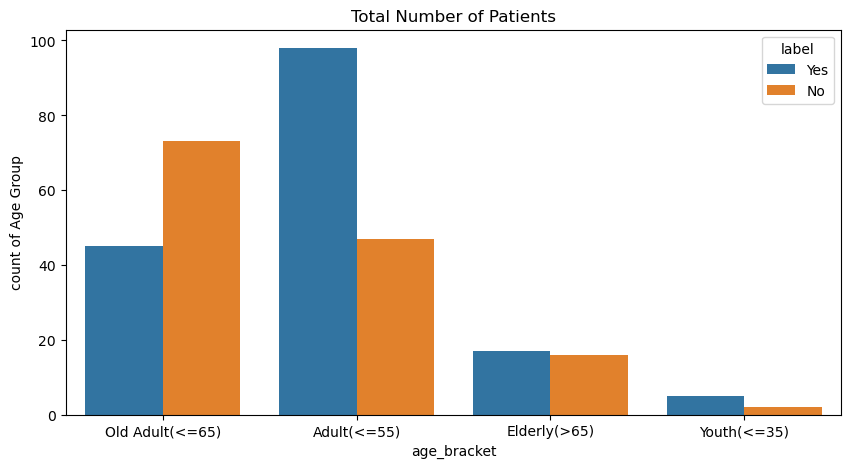

In [151]:
# Investigating the age group of patient by target feature
plt.figure(figsize = (10, 5))
sns.countplot(x= 'age_bracket', data=df, hue="label")
plt.xlabel("age_bracket")
plt.ylabel("count of Age Group")
plt.title('Total Number of Patients')  

--Insight: The distribution of heart disease appears to vary across age groups, showing a relatively high rate of heart disease among the ADULT(<=55).

Text(0.5, 1.0, 'Total Number of Patients')

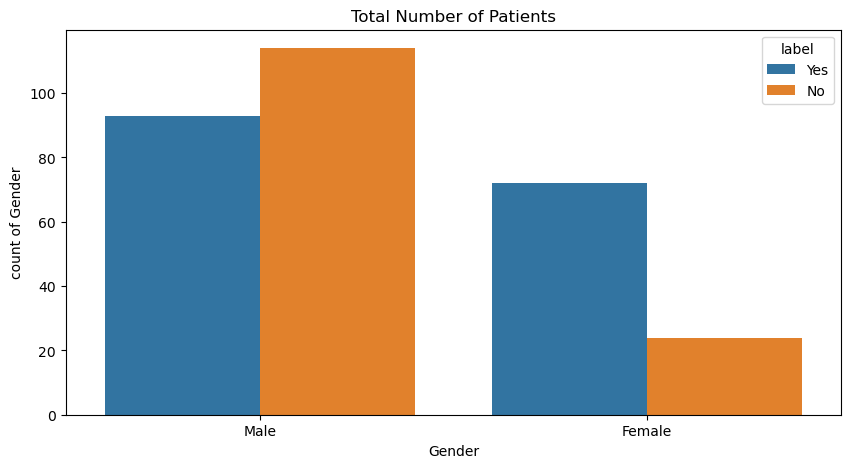

In [152]:
# Investigating the gender of patient by target feature
plt.figure(figsize = (10, 5))
sns.countplot(x= 'gender', data=df, hue="label")
plt.xlabel("Gender")
plt.ylabel("count of Gender")
plt.title('Total Number of Patients')  

Insight: The distribution of heart disease differs among gender,indicating Females have more patients with heart disease in proportion to the Female population than that of Male.

Text(0.5, 1.0, 'Total Number of Patients')

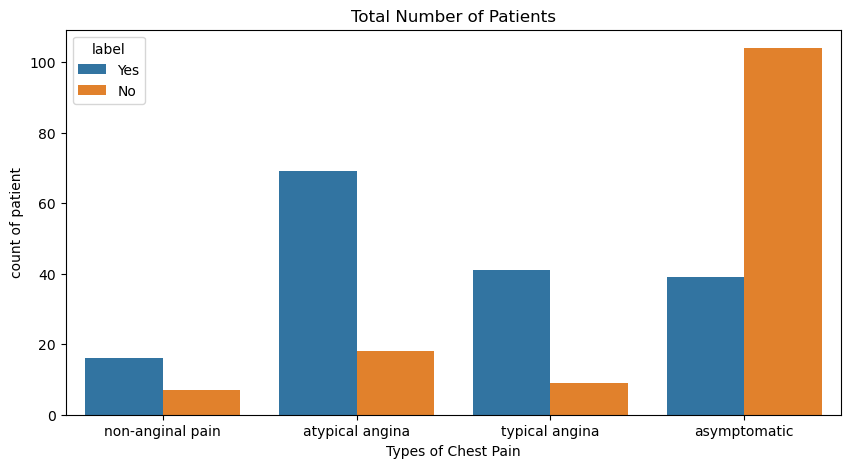

In [124]:
# Investigating the chest pain of patient by target feature
plt.figure(figsize = (10, 5))
sns.countplot(x= 'chp_cat', data=df, hue="label")
plt.xlabel("Types of Chest Pain")
plt.ylabel("count of patient")
plt.title('Total Number of Patients')  

--Insight: The distribution of heart disease differs among chest pain types, indicating potential high rate of heart disease among people with ATYPICAL ANGINA chest pain.

### Multivariate Analysis

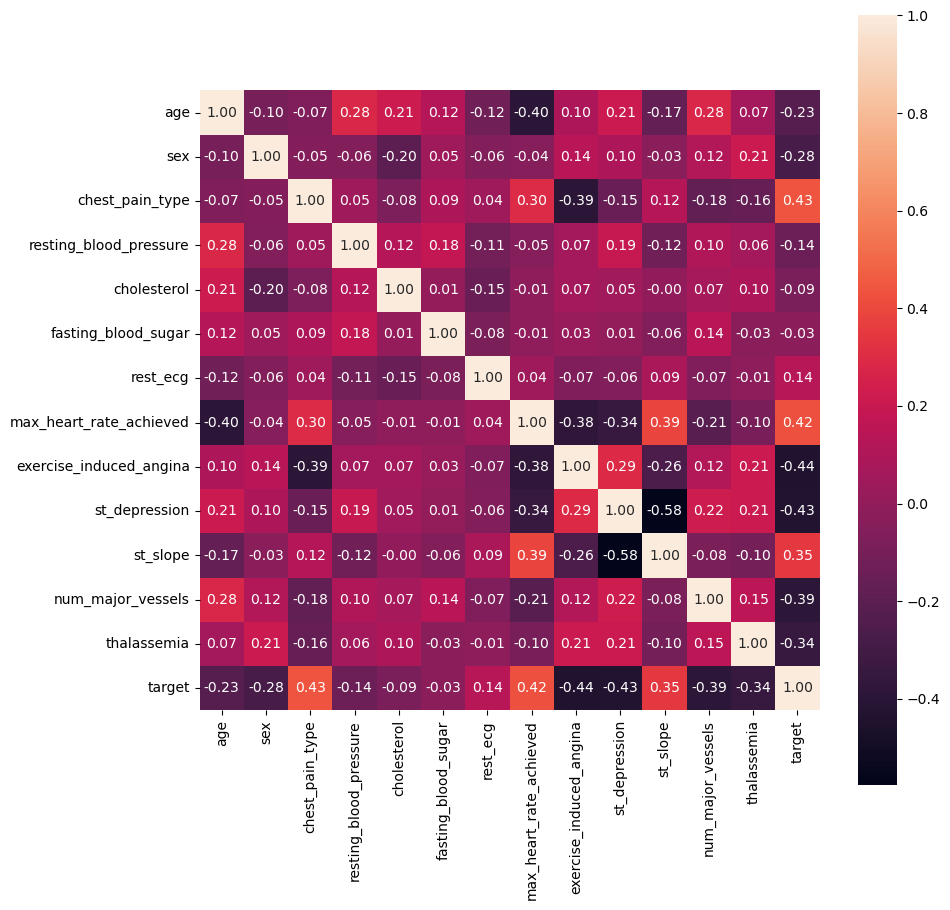

In [125]:
#Correlation between target and other variables in the dataset
plt.figure(figsize = (10, 10))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10})

--Insight: The heatmap helps identify correlations between variables. For example, there's a negative correlation between "exercise_induced_angina" and "max_heart_rate_achieved."

### Feature Engineering/ Data preprocessing

In [126]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'age_bracket',
       'gender', 'chp_cat', 'label'],
      dtype='object')

In [127]:
# Create a copy of the data( Exclude taget/label alongside other columns that was created)
df1 = df[['age', 'sex','chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia',]]
label = df[['target']]

In [128]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [129]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia'

# Normalize the data
scaler = MinMaxScaler()

df1["Scaled_ RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1["Scaled_ chol"] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1["Scaled_ thal"] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1["Scaled_ max_heart_rate"] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_ RBP,Scaled_ chol,Scaled_ thal,Scaled_ max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [130]:
# SPLITTING THE DATA INTO TRAINING AND TESTING
X_train,X_test,y_train,y_test = train_test_split(df1, label, test_size = 0.2, random_state = 42)

In [131]:
# Model Building

# Logistic Regression 

lrc = LogisticRegression()
lrc.fit(X_train, y_train)
lry_pred = lrc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test,lry_pred))
print("Recall:", recall_score(y_test,lry_pred))
print("Precision:", precision_score(y_test,lry_pred))
print("f1-score:", f1_score(y_test,lry_pred))
print("AUC-ROC:", roc_auc_score(y_test,lry_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Recall: 0.875
Precision: 0.875
f1-score: 0.875
AUC-ROC: 0.8685344827586206


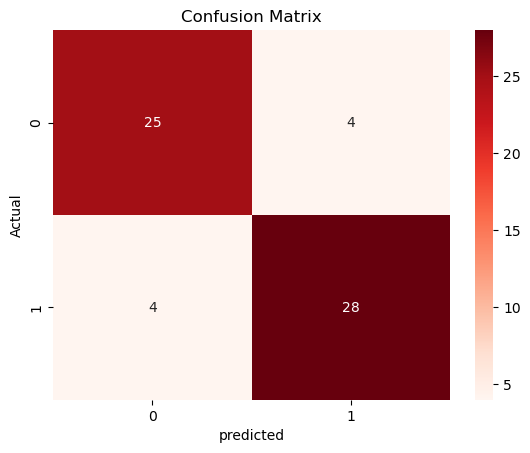

In [147]:
# Create a confusion matrix for Logistic Regression 
lcm = confusion_matrix(y_test,lry_pred)

# Visualize the confussion matrix
sns.heatmap(lcm, annot=True, cmap="Reds", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [133]:

# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test,rfy_pred))
print("Recall:", recall_score(y_test,rfy_pred))
print("Precision:", precision_score(y_test,rfy_pred))
print("f1-score:", f1_score(y_test,rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test,rfy_pred))

RandomForestClassifier
Accuracy: 0.8360655737704918
Recall: 0.84375
Precision: 0.84375
f1-score: 0.84375
AUC-ROC: 0.8356681034482758


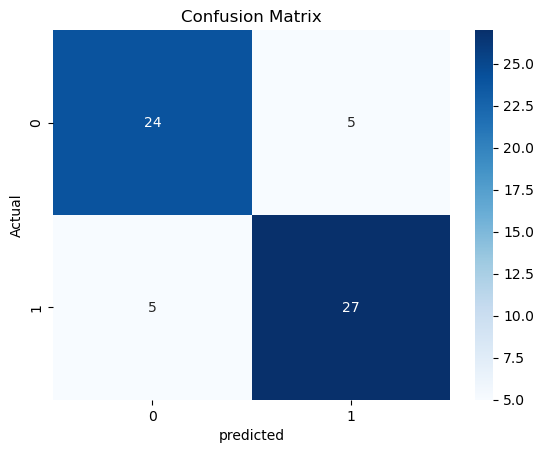

In [134]:
# Create a confusion matrix for Logistic Regression 
lcm = confusion_matrix(y_test,rfy_pred)

# Visualize the confussion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [135]:
#8 machine learning algorithms will be applied to the dataset
classifiers = [[XGBClassifier(),'XGB Classifier'],
              [RandomForestClassifier(),'Random Forest'],
              [KNeighborsClassifier(),"K-Nearest Neighbours"],
              [GaussianNB(),"Naive Bayes"],
              [SGDClassifier(),'SGD Classifier'],
              [SVC(),'SVC'],
              [DecisionTreeClassifier(random_state = 42),"Decision tree"],
              [LogisticRegression(),"Logistic Regression"]
              ]
              

In [138]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train,y_train)
    model_name = classifier[1]
    
    pred = model .predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [141]:
print("Accuracy Score")
A1 = pd.DataFrame(acc_list)
A1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,SGD Classifier,SVC,Decision tree,Logistic Regression
0,83.61%,86.89%,75.41%,86.89%,88.52%,65.57%,85.25%,86.89%


In [142]:
print("Precision")
A2 = pd.DataFrame(precision_list)
A2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,SGD Classifier,SVC,Decision tree,Logistic Regression
0,86.67%,85.29%,79.31%,90.0%,90.32%,65.71%,92.59%,87.5%


In [144]:
print("Recall")
A3 = pd.DataFrame(recall_list)
A3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,SGD Classifier,SVC,Decision tree,Logistic Regression
0,81.25%,90.62%,71.88%,84.38%,87.5%,71.88%,78.12%,87.5%


In [145]:
print("roc score")
A4 = pd.DataFrame(roc_list)
A4.head()

roc score


,XGB Classifier,Random Forest,K-Nearest Neighbours,Naive Bayes,SGD Classifier,SVC,Decision tree,Logistic Regression
0,83.73%,86.69%,75.59%,87.02%,88.58%,65.25%,85.61%,86.85%
